<a href="https://colab.research.google.com/github/dinarrahman30/Belajar-Pengembangan-Machine-Learning/blob/main/Klasifikasi_Gambar_dinar_wahyu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Klasifikasi Gambar: MNIST Database of Handwritten Digits
- **Nama:** Dinar Wahyu Rahman
- **Email:** dinarrahman30@gmail.com
- **ID Dicoding:** dinar_wahyu

 Link Dataset: [MNIST Database of Handwritten Digits]('https://archive.ics.uci.edu/dataset/683/mnist+database+of+handwritten+digits')

 Pada dataset ini terdapat 10 buah kelas (angka 0-9).

 Dengan total 60000 gambar

## Import Semua Packages/Library yang Digunakan

In [1]:
!pip install tensorflowjs
!pip install --upgrade tensorflow

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 36.4 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully unin

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
import tensorflowjs as tfjs
import numpy as np
%matplotlib inline

## Data Preparation

### Data Loading

In [3]:
# Memuat dataset MNIST
(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()

# Normalisasi gambar
x_train_full = x_train_full.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
print(f'Jumlah data training: {x_train_full.shape}')
print(f'Jumlah data test: {x_test.shape}')
print(f'Jumlah label training: {y_train_full.shape}')
print(f'Jumlah label test: {y_test.shape}')

Jumlah data training: (60000, 28, 28)
Jumlah data test: (10000, 28, 28)
Jumlah label training: (60000,)
Jumlah label test: (10000,)


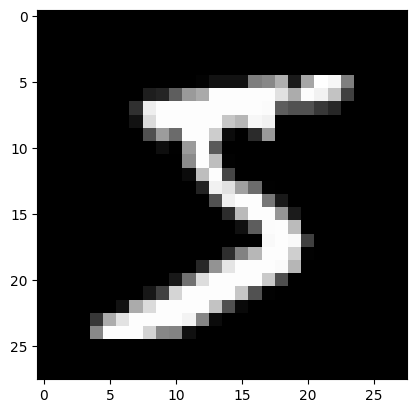

In [5]:
# Menampilkan gambar
img = x_train_full[0]
plt.imshow(img, cmap='gray')
plt.show()

### Data Preprocessing

#### Split Dataset

In [6]:
# Membagi data menjadi 80% untuk train dan 20% untuk validation
x_train, x_test, y_train, y_test = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

# Reshape data untuk dimasukkan ke dalam Conv2D (28x28 menjadi 28x28x1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print(f'Jumlah data training: {x_train.shape}')
print(f'Jumlah data test: {x_test.shape}')

Jumlah data training: (48000, 28, 28, 1)
Jumlah data test: (12000, 28, 28, 1)


## Modelling

In [7]:
# Membangun model CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Ringkasan model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Menentukan callback untuk menghentikan pelatihan jika akurasi lebih dari 95%
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Melatih model
history = model.fit(x_train, y_train, epochs=10, batch_size=64,
                    validation_data=(x_test, y_test),
                    callbacks=[callback])

# Akurasi pelatihan dan validasi
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]
print(f'Akurasi pada training set: {train_acc:.4f}')
print(f'Akurasi pada validation set: {val_acc:.4f}')

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 65s 79ms/step - accuracy: 0.8509 - loss: 0.4743 - val_accuracy: 0.9712 - val_loss: 0.0934
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 46s 62ms/step - accuracy: 0.9807 - loss: 0.0633 - val_accuracy: 0.9815 - val_loss: 0.0618
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 62ms/step - accuracy: 0.9875 - loss: 0.0397 - val_accuracy: 0.9888 - val_loss: 0.0374
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 49s 66ms/step - accuracy: 0.9907 - loss: 0.0298 - val_accuracy: 0.9889 - val_loss: 0.0410
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 80s 63ms/step - accuracy: 0.9925 - loss: 0.0230 - val_accuracy: 0.9882 - val_loss: 0.0398
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 46s 61ms/step - accuracy: 0.9945 - loss: 0.0191 - val_accuracy: 0.9904 - val_loss: 0.0347
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 62ms/step - accuracy: 0.9947 - loss: 0.0149 - val_accuracy: 0.9869 - val_loss: 0.0476
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 46s 61ms/step - accuracy: 0.9965 - loss: 0.0109 - 

## Evaluasi dan Visualisasi

In [9]:
# Evaluasi model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9905 - loss: 0.0347
Test Accuracy: 0.99


Akurasi model sebesar 99%

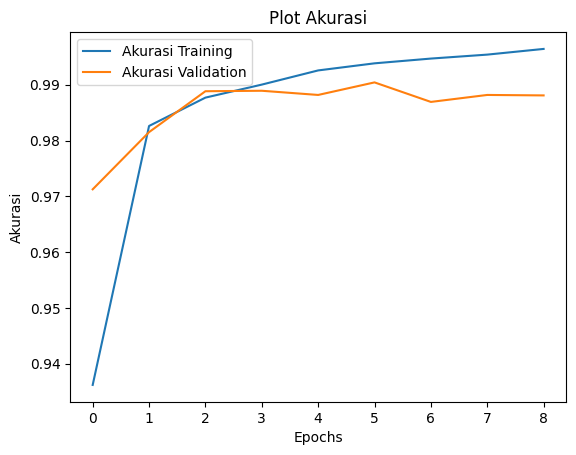

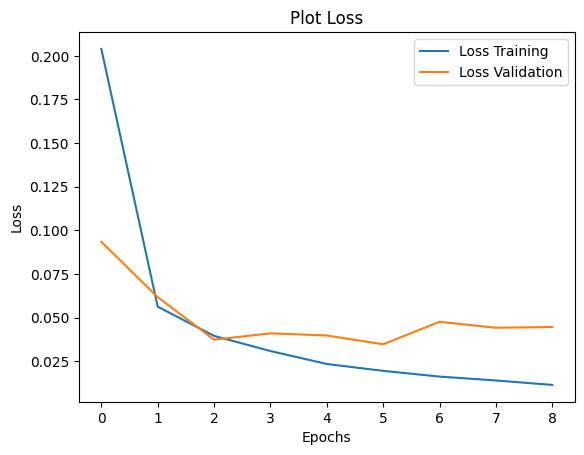

In [10]:
# Plot akurasi
plt.plot(history.history['accuracy'], label='Akurasi Training')
plt.plot(history.history['val_accuracy'], label='Akurasi Validation')
plt.xlabel('Epochs')
plt.ylabel('Akurasi')
plt.legend()
plt.title('Plot Akurasi')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Loss Training')
plt.plot(history.history['val_loss'], label='Loss Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Plot Loss')
plt.show()


## Konversi Model

In [11]:
import os
import tensorflowjs as tfjs

# Create directories for each format
savedmodel_folder = "savedmodel"
tfjs_folder = "tfjs"
tflite_folder = "tflite"

os.makedirs(savedmodel_folder, exist_ok=True)
os.makedirs(tfjs_folder, exist_ok=True)
os.makedirs(tflite_folder, exist_ok=True)

# Save model in SavedModel format
def save_as_savedmodel(model, folder):
    model.export(folder)
    print(f"Model saved as SavedModel format at {folder}")

# Save model in TFJS format
def save_as_tfjs(model, folder):
    tfjs.converters.save_keras_model(model, folder)
    print(f"Model saved as TFJS format at {folder}")

# Save model in TF-Lite format
def save_as_tflite(model, folder):
    tflite_model_path = os.path.join(folder, "mnist_model.tflite")
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    tflite_model = converter.convert()
    with open(tflite_model_path, "wb") as f:
        f.write(tflite_model)
    print(f"Model saved as TFLite format at {tflite_model_path}")

# Example usage (assuming `model` is your trained model)
save_as_savedmodel(model, savedmodel_folder)
save_as_tfjs(model, tfjs_folder)
save_as_tflite(model, tflite_folder)


Saved artifact at 'savedmodel'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  139239916111296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139239915595632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139239916117280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139239916113232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139239916119040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139239916116400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139239916116576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139239916117808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139239916113760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139239916119568: TensorSpec(shape=(), dtype=tf.resource, name=None)


Model saved as SavedModel format at savedmodel
failed to lookup keras version from the file,
    this is likely a weight only file
Model saved as TFJS format at tfjs
Saved artifact at '/tmp/tmp03wixzl9'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  139239916111296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139239915595632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139239916117280: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139239916113232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139239916119040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139239916116400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139239916116576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139239916117808: TensorSpec(shape=(), dtype=tf.resource, na

## Inference (Optional)

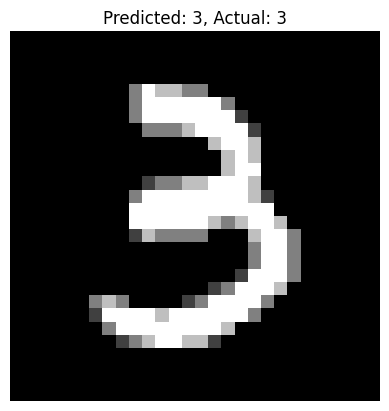

In [26]:
# Load model TF-Lite
interpreter = tf.lite.Interpreter(model_path="/content/tflite/mnist_model.tflite")
interpreter.allocate_tensors()

# Ambil informasi tensor input dan output
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Siapkan data masukan (misalnya, gambar pertama dari test set)
input_data = x_test[1:2].astype('float32')

# Set input tensor
interpreter.set_tensor(input_details[0]['index'], input_data)

# Jalankan inferensi
interpreter.invoke()

# Ambil output tensor dan ambil prediksi
output_data = interpreter.get_tensor(output_details[0]['index'])
predicted_class = np.argmax(output_data)

# Tampilkan gambar dan hasil prediksi
plt.imshow(x_test[1].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_class}, Actual: {y_test[1]}")
plt.axis('off')
plt.show()

In [27]:
import sklearn
sklearn.__version__

'1.5.2'